In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy


# Part 1: 1d Ising model

In this part, we'll use the MCMC algorithm to compute various expectation values for the 1d Ising model

$\beta H = \sum_i J s_i s_{i+1} + B s_i.$

You will need to complete some code snippets below.

In [ ]:
# 1d Ising model MCMC algorithm

# The main computation will be done in a function Ising1dMCMC, which has the following arguments:

# L = Linear size of system
# J = inverse temperature
# B = inverse temperature * magnetic field
# steps = number of steps in MC algorithm
# burn_time = number of steps before which we start collecting data from a sample
# num_points: We measure the correlation function <s_i s_{i+r}>. num_points defines the number of choices of r

def Ising1dMCMC(L,J,B,steps,burn_time,num_points):

  s = #### INSERT CODE SNIPPET 1 HERE
  # Construct a random spin state (an array of size L containing random integers 0 or 1 with equal probability)

  Avg_magnetization = 0.0 # stores the average magnetization
  TwoPointCorrelations = np.zeros(num_points); # array of size num_points; will store 2-point correlation function



  r_initial = 5; # Position 1 for 2-point CF
  r_final = np.zeros(num_points,dtype='int');
  # Define an array to set the values of Position 2 for the 2-point CF measurement
  for i in range(num_points):
      r_final[i]= r_initial + i; # set these positions


  # Here's the MCMC algorithm

  count = 0; # counter variable
  for i in range(steps-1):

    flip_x = np.random.randint(L); # Randomly pick a position at which to flip a spin
    s_new = s.copy(); # make a copy of the spin state (Important!)
    s_new[flip_x] = -1*s[flip_x]; # flip the spin

    AR = #  #### INSERT CODE SNIPPET 2 HERE
    # AR stores the relative probability of the flipped spin state and the original state.
    #(If the energy difference is dE, this probability is exp(\beta * dE) )
    # Note: be careful about boundary conditions while defining your arrays! We are assuming periodic boundary conditions.

    u = np.random.rand();


    # #### INSERT CODE SNIPPET 2 HERE Write the update condition in terms of AR (calculated above) and the uniform random number u
    if ------:


    # If burn time is elapsed, use the state stored in 's' to compute avg magnetization and 2-point correlation functions

    if i>burn_time:
      for i in range(num_points):
        TwoPointCorrelations += s[r_initial]*s[r_final];
        Avg_magnetization += np.sum(s)/(L*L);
      count=count+1;


  # Return the avg magnetization, the array of 2-point CF values, and the final spin state
  return Avg_magnetization/(count), TwoPointCorrelations/(count),s


def main():

  # Initialize parameters
  L = 20;
  J = 1.;
  B = 1;
  steps = 50000;
  burn_time = 25000;
  num_points = 10;
  TwoPointCorrelations1d = np.zeros(num_points);
  xvals = np.arange(num_points);

  Avg_magnetization = 0.0;
  svals = np.zeros((num_points,L));
  xvals = np.arange(num_points);

  # Run the MCMC algorithm from above
  Avg_magnetization, TwoPointCorrelations1d,svals = Ising1dMCMC(L,J,B,steps,burn_time,num_points);


  # Now plot the results. We'll make 2 plots:
  # 1: Plot 2-point CF vs time
  plt.figure(1)
  plt.plot(xvals,np.log(np.abs(TwoPointCorrelations1d)),'b*');
  # Calculate the line of best fit parameters (slope 'm', intercept 'b')
  # The degree of the polynomial is set to 1 for a straight line
  m, b = np.polyfit(xvals,np.log(np.abs(TwoPointCorrelations1d)), 1)

  # 3. Create the y-values for the fitted line
  # This can be done by calculating m*x + b for the x-values
  y_fitted = m * xvals + b

  # 4. Plot the original scatter points and the fitted line

  plt.plot(xvals, y_fitted, color='steelblue', linestyle='--', linewidth=2, label=f'Fitted line: y = {m:.2f}x + {b:.2f}')

  # Add labels, title, and a legend
  plt.title("Scatter Plot with Line of Best Fit")
  plt.xlabel("r")
  plt.ylabel("2-point correlation <s_i s_{i+r}>")
  plt.legend()

  # 2: Plot the final spin state
  plt.figure(2)
  plt.plot(svals,'*');
  plt.title("Visualizing the state")
  plt.show()

if __name__ == "__main__":
    main()



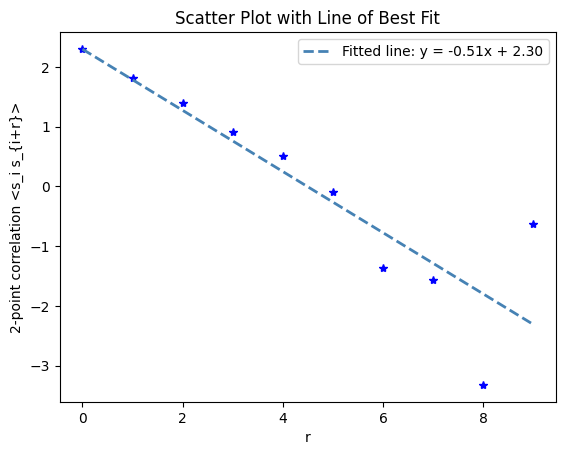

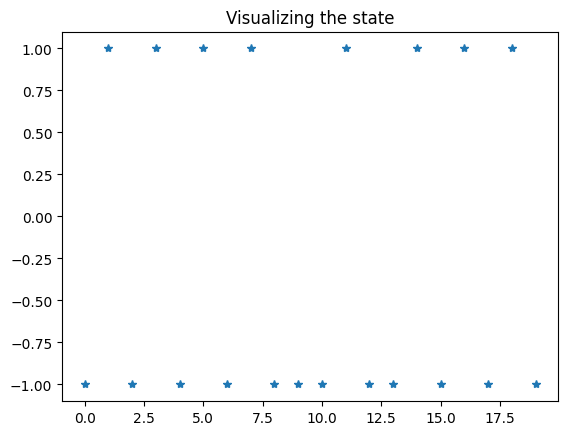

# Part 2: 2d Ising model

Same exercise, now in one higher dimension! Most of the code snippets you will need to complete are direct generalizations of the 1d case.

In [ ]:
# 2d Ising model MCMC

# Initialize variables
def IsingMCMC2d(L,J,B,steps,burn_time,num_points):
# L = linear size (so now the spin state is an array of size L*L)
# steps = number of MC steps
# ri = (xi,yi) = position of initial point
# rj = (xj,yj) = position of final point
# NOTE: The 2 coordinates (x,y) are packaged into a single number as r = y + L*x
# so the points r = 1,2, ...,L form the left-most column in space
# and r = L+1, L+2, ..., 2L form the next column, and so on

# correlation is measured between ri and rj
# we use periodic boundary conditions


  s = # INSERT CODE SNIPPET 1
  # Constructs a random spin state (an array of size L*L containing random integers 0 or 1 with equal probability)

  Avg_magnetization = 0.0 # stores the average magnetization
  TwoPointCorrelations2d = np.zeros(num_points);
  count = 0;


  r_initial = 5;
  r_final = np.zeros(num_points,dtype='int');
  for i in range(num_points):
    r_final[i]= r_initial+L*i; # INSERT CODE SNIPPET 2 HERE
    # Choose r_final[i] to be a distance i away from r_initial. There are multiple choices, pick any one

  for i in range(steps-1):
    # randomly pick a spin to flip
    flip_x = np.random.randint(L*L);
    # store a copy of the current spin state
    s_new = s.copy();
    # flip the chosen spin in the copy
    s_new[flip_x] = -1*s[flip_x];
    # INSERT CODE SNIPPET 3 HERE
    # First calculate the numbers r1, r2, r3, r4 corresponding to the four nearest neighbors of flip_x
    # (careful about boundary conditions!)

    r1 =
    r2 =
    r3 =
    r4 =

    # INSERT CODE SNIPPET 4 HERE:
    # Calculate the acceptance ratio in terms of s[r1], s[r2], s[r3], s[r4] and s[flip_x]

    AR =
    u = np.random.rand();

    # INSERT CODE SNIPPET 5 HERE
    # Write the update condition for s in terms of AR and u


    # Now calculate the expectation values

    if i>burn_time:
      for i in range(num_points):
        TwoPointCorrelations2d += s[r_initial]*s[r_final];
        Avg_magnetization += np.sum(s)/(L*L);
      count=count+1;


  return Avg_magnetization/(count*num_points), TwoPointCorrelations2d/(count*num_points),s



-3.5689975198013935 [10.          6.29650372  2.45299624 -2.42979438 -2.81462517 -0.30962477
  3.00024002  4.23713897  6.1324906   6.34610769]


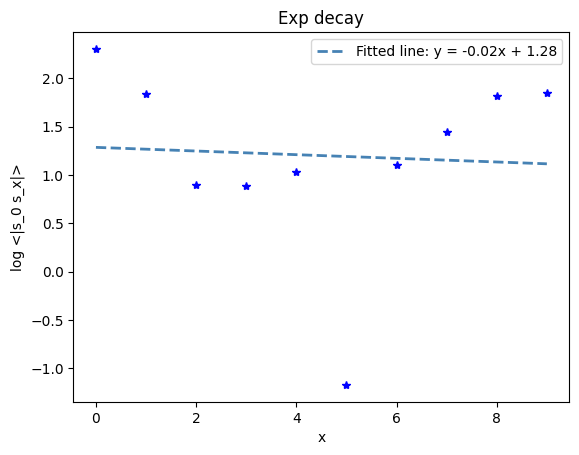

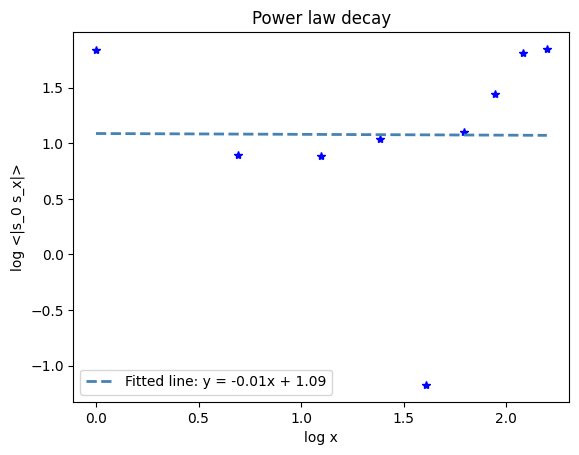

<Figure size 640x480 with 0 Axes>

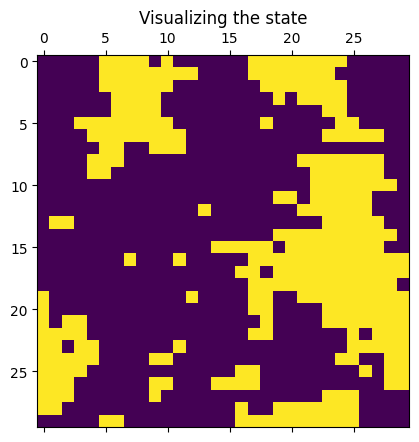

In [ ]:

# Initialize 2d Ising parameters
L = 30;
J = 0.44;
B = 0;
steps = 50000;
burn_time = 25000;
num_points = 10;
Avg_magnetization = 0.0;
TwoPointCorrelations2d = np.zeros(num_points);
svals = np.zeros((num_points,L*L));
xvals = np.arange(num_points);

# Run the above MCMC
Avg_magnetization, TwoPointCorrelations2d,svals = IsingMCMC2d(L,J,B,steps,burn_time,num_points);


print(Avg_magnetization, TwoPointCorrelations2d);

# PLOTTING!! We'll make 3 plots in total:
# 1. Check for exponential decay of 2-point CF
# 2. Check for power-law decay of 2-point CF
# 3. Visualize the final spin state

# 1. Test for exponential decay in correlation function
plt.figure(1)
plt.plot(xvals,np.log(np.abs(TwoPointCorrelations2d)),'b*');
# Calculate the line of best fit parameters (slope 'm1', intercept 'b1')
# Note: the fitting tool is different from the 1d case
m1, b1, r1, p1, err1 = scipy.stats.linregress(xvals,np.log(np.abs(TwoPointCorrelations2d)))

# Create the y-values for the fitted line
# This can be done by calculating m*x + b for the x-values
y_fitted1 = m1 * xvals + b1

# Plot the original scatter points and the fitted line

plt.plot(xvals, y_fitted1, color='steelblue', linestyle='--', linewidth=2, label=f'Fitted line: y = {m1:.2f}x + {b1:.2f}')

# Add labels, title, and a legend
plt.title("Exp decay")
plt.xlabel("x")
plt.ylabel("log <|s_0 s_x|>")
plt.legend(title=np.around(r1**2,2), title_fontsize='12')

# 2. Test for power law decay
plt.figure(2)
plt.plot(np.log(xvals[1:]),np.log(np.abs(TwoPointCorrelations2d[1:])),'b*');
# Calculate the line of best fit parameters (slope 'm2', intercept 'b2')

m2, b2, r2, p2, err2 = scipy.stats.linregress(np.log(xvals[1:]),np.log(np.abs(TwoPointCorrelations2d[1:])))

# Create the y-values for the fitted line
# This can be done by calculating m*x + b for the x-values
y_fitted2 = m2 * np.log(xvals[1:]) + b2

# Plot the original scatter points and the fitted line

plt.plot(np.log(xvals[1:]), y_fitted2, color='steelblue', linestyle='--', linewidth=2, label=f'Fitted line: y = {m2:.2f}x + {b2:.2f}')

# Add labels, title, and a legend
plt.title("Power law decay")
plt.xlabel("log x")

plt.ylabel("log <|s_0 s_x|>")
plt.legend(title=np.around(r2**2,2), title_fontsize='12')


# 3. Visualize the final spin state
plt.figure(3)
plt.matshow(svals.reshape(L,L)); # NOTE: reshaping arrays can be very useful!
plt.title("Visualizing the state")
plt.show()


